<a href="https://colab.research.google.com/github/sahil3Vedi/Incremental-Optimisation-CNNs/blob/main/Incremental_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Implementing LeNet 5 on the MNIST dataset using Keras
'''
# Credits to https://github.com/vaibhavcodes/DeepLearning-Architectures for providing the starter code

# Importing Libraries
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense, Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
# Image processing & plotting
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [ ]:
# Loading the dataset and performing train-test split
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Spawn multiple, incrementally denoised copies of the training data

train_1 = train_x # No Denoising
train_2 = []
train_3 = []
train_4 = []
train_5 = []

kernel_2 = np.ones((2,2),np.float32)/4
kernel_3 = np.ones((3,3),np.float32)/9
kernel_4 = np.ones((4,4),np.float32)/16
kernel_5 = np.ones((25,25),np.float32)/25

for img in train_x:
  sharp = img.reshape(28,28)
  dst_2 = cv.filter2D(sharp,-1,kernel_2)
  dst_3 = cv.filter2D(sharp,-1,kernel_3)
  dst_4 = cv.filter2D(sharp,-1,kernel_4)
  dst_5 = cv.filter2D(sharp,-1,kernel_5)
  train_2.append(dst_2)
  train_3.append(dst_3)
  train_4.append(dst_4)
  train_5.append(dst_5)

train_1 = np.array(train_1)
train_2 = np.array(train_2)
train_3 = np.array(train_3)
train_4 = np.array(train_4)
train_5 = np.array(train_5)


In [ ]:
print(np.shape(train_x))
print(np.shape(train_1))
print(np.shape(train_2))
print(np.shape(train_3))
print(np.shape(train_4))
print(np.shape(train_5))

(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28)


In [ ]:
# Checking the sizes of train and test split
print("The size of train_1 is: {}".format(train_1.shape))
print("The size of train_2 is: {}".format(train_2.shape))
print("The size of train_3 is: {}".format(train_3.shape))
print("The size of train_4 is: {}".format(train_4.shape))
print("The size of train_5 is: {}".format(train_5.shape))
print("The size of train_x is: {}".format(train_x.shape))
print("The size of train_y is: {}".format(train_y.shape))
print("The size of test_x is: {}".format(test_x.shape))
print("The size of test_y is: {}".format(test_y.shape))

# Performing reshaping operations = Converting into 4D
train_1 = train_1.reshape(train_1.shape[0], 28, 28, 1)
train_2 = train_2.reshape(train_2.shape[0], 28, 28, 1)
train_3 = train_3.reshape(train_3.shape[0], 28, 28, 1)
train_4 = train_4.reshape(train_4.shape[0], 28, 28, 1)
train_5 = train_5.reshape(train_5.shape[0], 28, 28, 1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

# Normalizing the values of the image- Converting in between 0 and 1
train_1 = train_1/255.0
train_2 = train_2/255.0
train_3 = train_3/255.0
train_4 = train_4/255.0
train_5 = train_5/255.0
train_x = train_x/255.0
test_x = test_x/255.0

# One-hot encoding the labels
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

The size of train_1 is: (60000, 28, 28)
The size of train_2 is: (60000, 28, 28)
The size of train_3 is: (60000, 28, 28)
The size of train_4 is: (60000, 28, 28)
The size of train_5 is: (60000, 28, 28)
The size of train_x is: (60000, 28, 28)
The size of train_y is: (60000,)
The size of test_x is: (10000, 28, 28)
The size of test_y is: (10000,)


In [ ]:
# Building the Model Architecture

# Instanciate an empty model
model = Sequential()

# Adding a Convolution Layer C1
# Input shape = N = (28 x 28)
# No. of filters  = 6
# Filter size = f = (5 x 5)
# Padding = P = 0
# Strides = S = 1
# Size of each feature map in C1 is (N-f+2P)/S +1 = 28-5+1 = 24
# No. of parameters between input layer and C1 = (5*5 + 1)*6 = 156
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='tanh'))

# Adding an Average Pooling Layer S2
# Input shape = N = (24 x 24)
# No. of filters = 6
# Filter size = f = (2 x 2)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in S2 is (N-f+2P)/S +1 = (24-2+0)/2+1 = 11+1 = 12
# No. of parameters between C1 and S2 = (1+1)*6 = 12
model.add(AvgPool2D(pool_size=(2,2)))

# Adding a Convolution Layer C3
# Input shape = N = (12 x 12)
# No. of filters  = 16
# Filter size = f = (5 x 5)
# Padding = P = 0
# Strides = S = 1
# Size of each feature map in C3 is (N-f+2P)/S +1 = 12-5+1 = 8
# No. of parameters between S2 and C3 = (5*5*6*16 + 16) + 16 = 2416
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))

# Adding an Average Pooling Layer S4
# Input shape = N = (8 x 8)
# No. of filters = 16
# Filter size = f = (2 x 2)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in S4 is (N-f+2P)/S +1 = (8-2+0)/2+1 = 3+1 = 4
# No. of parameters between C3 and S4 = (1+1)*16 = 32
model.add(AvgPool2D(pool_size=(2,2)))

# As compared to LeNet-5 architecture there was one more application of convolution but in our code  further application of 
# convolution with (5 x 5) filter would result in a negative dimension which is not possible. So we aren't applying any more
# convolution here.

# Flattening the layer S4
# There would be 16*(4*4) = 256 neurons
model.add(Flatten())

# Adding a Dense layer with `tanh` activation+# 
# No. of inputs = 256
# No. of outputs = 120
# No. of parameters = 256*120 + 120 = 30,840
model.add(Dense(120, activation='tanh'))
model.add(Dropout(.2, input_shape=(120,)))

# Adding a Dense layer with `tanh` activation
# No. of inputs = 120
# No. of outputs = 84
# No. of parameters = 120*84 + 84 = 10,164
model.add(Dense(84, activation='tanh'))
model.add(Dropout(.05, input_shape=(84,)))

# Adding a Dense layer with `softmax` activation
# No. of inputs = 84
# No. of outputs = 10
# No. of parameters = 84*10 + 10 = 850
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_5 = model.fit(train_5, train_y, batch_size=64, epochs=6, verbose=1, validation_data=(test_x, test_y))
history_4 = model.fit(train_4, train_y, batch_size=64, epochs=6, verbose=1, validation_data=(test_x, test_y))
history_3 = model.fit(train_3, train_y, batch_size=64, epochs=6, verbose=1, validation_data=(test_x, test_y))
history_2 = model.fit(train_2, train_y, batch_size=64, epochs=6, verbose=1, validation_data=(test_x, test_y))
history_1 = model.fit(train_1, train_y, batch_size=64, epochs=6, verbose=1, validation_data=(test_x, test_y))

Epoch 1/6
938/938 [==============================] - 7s 6ms/step - loss: 2.0192 - accuracy: 0.2275 - val_loss: 5.8536 - val_accuracy: 0.0609
Epoch 2/6
938/938 [==============================] - 5s 6ms/step - loss: 1.8896 - accuracy: 0.2795 - val_loss: 6.7305 - val_accuracy: 0.0689
Epoch 3/6
938/938 [==============================] - 5s 5ms/step - loss: 1.8438 - accuracy: 0.3003 - val_loss: 7.2849 - val_accuracy: 0.0644
Epoch 4/6
938/938 [==============================] - 5s 5ms/step - loss: 1.8152 - accuracy: 0.3141 - val_loss: 7.4606 - val_accuracy: 0.0665
Epoch 5/6
938/938 [==============================] - 5s 5ms/step - loss: 1.7930 - accuracy: 0.3225 - val_loss: 7.0073 - val_accuracy: 0.0664
Epoch 6/6
938/938 [==============================] - 5s 5ms/step - loss: 1.7794 - accuracy: 0.3269 - val_loss: 6.8329 - val_accuracy: 0.0668
Epoch 1/6
938/938 [==============================] - 5s 5ms/step - loss: 0.3863 - accuracy: 0.8875 - val_loss: 0.2868 - val_accuracy: 0.9122
Epoch 2/6
938

30 30


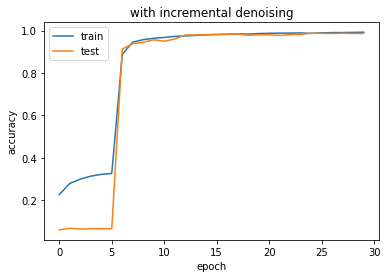

In [ ]:
# TRAINING ACCURACY SUMMARY
acc_5 = history_5.history['accuracy']
acc_4 = history_4.history['accuracy']
acc_3 = history_3.history['accuracy']
acc_2 = history_2.history['accuracy']
acc_1 = history_1.history['accuracy']

# TESTING ACCURACY SUMMARY
val_acc_5 = history_5.history['val_accuracy']
val_acc_4 = history_4.history['val_accuracy']
val_acc_3 = history_3.history['val_accuracy']
val_acc_2 = history_2.history['val_accuracy']
val_acc_1 = history_1.history['val_accuracy']

acc = []
for a in acc_5:
  acc.append(a)
for b in acc_4:
  acc.append(b)
for c in acc_3:
  acc.append(c)
for d in acc_2:
  acc.append(d)
for e in acc_1:
  acc.append(e)

val_acc = []
for va in val_acc_5:
  val_acc.append(va)
for vb in val_acc_4:
  val_acc.append(vb)
for vc in val_acc_3:
  val_acc.append(vc)
for vd in val_acc_2:
  val_acc.append(vd)
for ve in val_acc_1:
  val_acc.append(ve)

print(len(acc),len(val_acc))

plt.plot(acc)
plt.plot(val_acc)
plt.title('with incremental denoising')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Finding the loss and accuracy of the model
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9863
Test Loss: 0.047144610434770584
Test accuracy: 0.986299991607666
